# Классификация с помощью kNN. Кластеризация K-means

__1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.__

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import random
import seaborn as sns
sns.set_palette("husl")
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

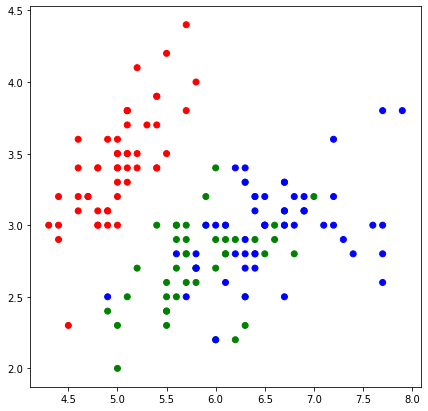

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [3]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1 / d[0] ** 2
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


In [4]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

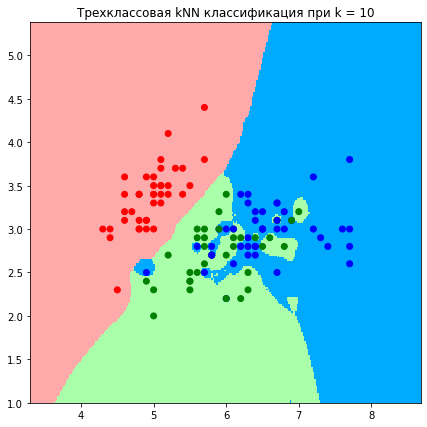

In [5]:
get_graph(X_train, y_train, k)

__2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).__

In [6]:
X, y = make_blobs(n_samples=100, random_state=1)

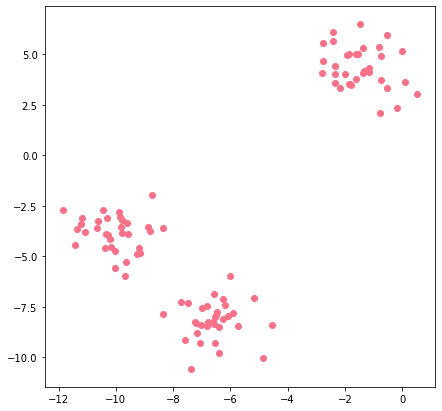

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [8]:
max_iterations = 3

min_distance = 1e-4

k = 3

In [9]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    for class_item in classes:
        class_error = 0
        for x in classes[class_item]:
            plt.scatter(centroids[class_item][0], centroids[class_item][1], marker='x', s=130, c='black')
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.show()

In [10]:
def kmeans(data, k, max_iterations, min_distance):
    error = []
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        old_centroids = centroids.copy()
        
        for classification in classes:
            
            centroids[classification] = np.average(classes[classification], axis=0)
   
        optimal = True
        for centroid in range(len(centroids)):
            if abs(np.sum((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        if optimal:
            pass
        
        error.append(count_error(old_centroids, classes))
    
    return old_centroids, classes, error


Функция подсчета ошибки

In [11]:
def count_error(centroids, classes):
    error = []
    for class_item in classes:
        class_error = 0
        for x in classes[class_item]:
            class_error += e_metrics(x, centroids[class_item])**2
        class_error = np.sqrt(class_error / len(classes[class_item]))
        error.append(class_error)
    return error

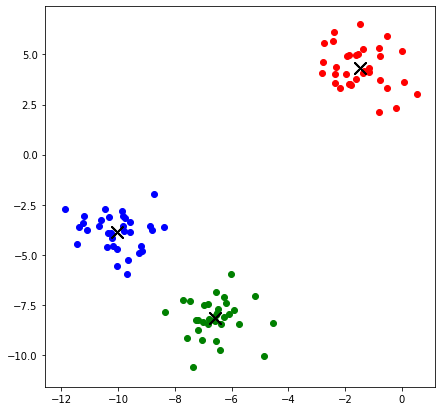

In [12]:
centroids, clusters, error = kmeans(X, k, 5, min_distance)

visualize(centroids, clusters)

[]

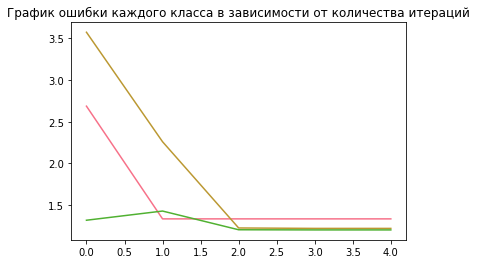

In [13]:
plt.title(f"График ошибки каждого класса в зависимости от количества итераций")
plt.plot(error)
plt.plot()